In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 1, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50391 stdev: 0.06343
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 182
Average adjusted fitness: 0.144
Mean genetic distance 2.868, standard deviation 0.473
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.847 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53861 stdev: 0.07466
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 182
Average adjusted fitness: 0.205
Mean genetic distance 2.933, standard deviation 0.475
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 9.665 sec (10.256 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56257 stdev: 0.06728
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 182
Average adjusted fitness: 0.171
Mean genetic distance 2.950, standard deviation 0.494
Population of 202 members in 25 species
Total extinct

Population's average fitness: 0.62553 stdev: 0.08561
Best fitness: 0.77675 - size: (5, 20) - species 17 - id 2161
Average adjusted fitness: 0.235
Mean genetic distance 3.222, standard deviation 0.508
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.625 sec (12.025 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62928 stdev: 0.08243
Best fitness: 0.77675 - size: (5, 20) - species 17 - id 2161
Average adjusted fitness: 0.265
Mean genetic distance 3.225, standard deviation 0.508
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 12.423 sec (12.122 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62118 stdev: 0.08661
Best fitness: 0.77675 - size: (5, 20) - species 17 - id 2161
Average adjusted fitness: 0.204
Mean genetic distance 3.249, standard deviation 0.508
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 12.651 sec (12.229 average)

 

Population's average fitness: 0.63063 stdev: 0.09660
Best fitness: 0.79839 - size: (6, 22) - species 17 - id 4760
Average adjusted fitness: 0.268
Mean genetic distance 3.237, standard deviation 0.578
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 13.733 sec (15.147 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63103 stdev: 0.09535
Best fitness: 0.79839 - size: (6, 22) - species 17 - id 4760
Average adjusted fitness: 0.254
Mean genetic distance 3.235, standard deviation 0.557
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 15.532 sec (15.198 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63340 stdev: 0.09506
Best fitness: 0.79839 - size: (10, 26) - species 38 - id 7643
Average adjusted fitness: 0.257
Mean genetic distance 3.224, standard deviation 0.567
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 15.942 sec (15.393 average)



Population's average fitness: 0.63213 stdev: 0.09573
Best fitness: 0.81818 - size: (10, 29) - species 38 - id 10467
Average adjusted fitness: 0.201
Mean genetic distance 3.117, standard deviation 0.584
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 15.322 sec (14.728 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.63026 stdev: 0.09343
Best fitness: 0.81818 - size: (10, 29) - species 38 - id 10467
Average adjusted fitness: 0.250
Mean genetic distance 3.094, standard deviation 0.592
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 15.317 sec (14.815 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63986 stdev: 0.09597
Best fitness: 0.81818 - size: (10, 29) - species 38 - id 10467
Average adjusted fitness: 0.267
Mean genetic distance 3.081, standard deviation 0.595
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 14.759 sec (14.908 avera

Population's average fitness: 0.65382 stdev: 0.09142
Best fitness: 0.82127 - size: (12, 34) - species 38 - id 12909
Average adjusted fitness: 0.166
Mean genetic distance 3.119, standard deviation 0.660
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 19.958 sec (19.312 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.63074 stdev: 0.10201
Best fitness: 0.82127 - size: (12, 34) - species 38 - id 12909
Average adjusted fitness: 0.188
Mean genetic distance 3.110, standard deviation 0.625
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 19.696 sec (19.441 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.64397 stdev: 0.09619
Best fitness: 0.82127 - size: (12, 34) - species 38 - id 12909
Average adjusted fitness: 0.189
Mean genetic distance 3.137, standard deviation 0.639
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 21.614 sec (19.693 avera

Population's average fitness: 0.62065 stdev: 0.10161
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.201
Mean genetic distance 3.128, standard deviation 0.613
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 21.537 sec (20.975 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.61348 stdev: 0.10397
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.180
Mean genetic distance 3.140, standard deviation 0.588
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 21.230 sec (20.867 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63172 stdev: 0.10119
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.249
Mean genetic distance 3.145, standard deviation 0.610
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 20.400 sec (20.770 ave

Population's average fitness: 0.62161 stdev: 0.09741
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.177
Mean genetic distance 3.175, standard deviation 0.658
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 21.607 sec (22.973 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.62834 stdev: 0.09997
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.207
Mean genetic distance 3.166, standard deviation 0.651
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 21.879 sec (23.114 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.61902 stdev: 0.10173
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.215
Mean genetic distance 3.174, standard deviation 0.615
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 21.201 sec (23.135 ave

Population's average fitness: 0.62804 stdev: 0.09947
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.168
Mean genetic distance 3.038, standard deviation 0.671
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 24.213 sec (22.762 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.64134 stdev: 0.09734
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.227
Mean genetic distance 3.032, standard deviation 0.628
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 23.436 sec (23.079 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.61895 stdev: 0.09899
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.262
Mean genetic distance 2.998, standard deviation 0.627
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 21.130 sec (23.145 avera

Population's average fitness: 0.64922 stdev: 0.09970
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.198
Mean genetic distance 2.879, standard deviation 0.460
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.849 sec (20.778 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.65143 stdev: 0.10354
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.284
Mean genetic distance 2.866, standard deviation 0.456
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 20.684 sec (20.861 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.64822 stdev: 0.10319
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.234
Mean genetic distance 2.871, standard deviation 0.445
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 20.596 sec (20.768 ave

Population's average fitness: 0.63068 stdev: 0.09848
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.201
Mean genetic distance 2.819, standard deviation 0.466
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 23.041 sec (21.856 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.62635 stdev: 0.10407
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.290
Mean genetic distance 2.826, standard deviation 0.469
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 23.931 sec (22.126 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.62854 stdev: 0.09798
Best fitness: 0.82498 - size: (15, 41) - species 47 - id 18850
Average adjusted fitness: 0.181
Mean genetic distance 2.799, standard deviation 0.491
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.602 sec (22.589 ave

Population's average fitness: 0.65244 stdev: 0.10187
Best fitness: 0.82622 - size: (13, 38) - species 38 - id 40053
Average adjusted fitness: 0.343
Mean genetic distance 2.796, standard deviation 0.476
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 18.531 sec (22.765 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.65230 stdev: 0.10066
Best fitness: 0.82622 - size: (13, 38) - species 38 - id 40053
Average adjusted fitness: 0.242
Mean genetic distance 2.771, standard deviation 0.472
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 18.440 sec (22.101 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.64330 stdev: 0.09820
Best fitness: 0.82622 - size: (13, 38) - species 38 - id 40053
Average adjusted fitness: 0.299
Mean genetic distance 2.787, standard deviation 0.480
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 19.112 sec (21.481 ave

Population's average fitness: 0.61546 stdev: 0.09533
Best fitness: 0.82746 - size: (14, 41) - species 38 - id 42687
Average adjusted fitness: 0.173
Mean genetic distance 2.816, standard deviation 0.468
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.886 sec (20.103 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.62818 stdev: 0.10189
Best fitness: 0.82746 - size: (14, 41) - species 38 - id 42687
Average adjusted fitness: 0.222
Mean genetic distance 2.844, standard deviation 0.477
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 19.785 sec (20.072 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.61875 stdev: 0.09831
Best fitness: 0.82746 - size: (14, 41) - species 38 - id 42687
Average adjusted fitness: 0.187
Mean genetic distance 2.829, standard deviation 0.487
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 19.779 sec (20.039 ave

Population's average fitness: 0.64310 stdev: 0.10040
Best fitness: 0.82746 - size: (14, 41) - species 38 - id 42687
Average adjusted fitness: 0.180
Mean genetic distance 2.900, standard deviation 0.500
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 19.301 sec (18.862 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.64252 stdev: 0.10069
Best fitness: 0.82746 - size: (14, 41) - species 38 - id 42687
Average adjusted fitness: 0.217
Mean genetic distance 2.874, standard deviation 0.501
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 18.991 sec (18.888 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.65081 stdev: 0.10373
Best fitness: 0.82746 - size: (14, 41) - species 38 - id 42687
Average adjusted fitness: 0.250
Mean genetic distance 2.879, standard deviation 0.523
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 19.325 sec (18.924 ave

Population's average fitness: 0.63690 stdev: 0.10012
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.195
Mean genetic distance 2.785, standard deviation 0.510
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.140 sec (19.316 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.63667 stdev: 0.09557
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.209
Mean genetic distance 2.801, standard deviation 0.503
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 18.929 sec (19.277 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.63972 stdev: 0.10006
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.194
Mean genetic distance 2.809, standard deviation 0.495
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 19.039 sec (19.252 

Mean genetic distance 2.803, standard deviation 0.507
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.442 sec (18.325 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.65154 stdev: 0.10403
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.257
Mean genetic distance 2.775, standard deviation 0.499
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 19.249 sec (18.471 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.64921 stdev: 0.09948
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.194
Mean genetic distance 2.783, standard deviation 0.485
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 19.275 sec (18.570 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.64286 stdev: 0.10249
Best fitness: 0.82746 - size: (14, 41) - speci

Population's average fitness: 0.63757 stdev: 0.11056
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.209
Mean genetic distance 2.699, standard deviation 0.433
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 20.011 sec (19.994 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.64269 stdev: 0.10243
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.219
Mean genetic distance 2.719, standard deviation 0.440
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.903 sec (19.940 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.63894 stdev: 0.10766
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.230
Mean genetic distance 2.731, standard deviation 0.448
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.259 sec (19.829 

Population's average fitness: 0.64517 stdev: 0.10697
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.215
Mean genetic distance 2.871, standard deviation 0.529
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.335 sec (16.776 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.64525 stdev: 0.10848
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.283
Mean genetic distance 2.908, standard deviation 0.527
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 14.934 sec (16.491 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.64607 stdev: 0.09998
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.183
Mean genetic distance 2.871, standard deviation 0.521
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 14.478 sec (16.172 

Mean genetic distance 2.759, standard deviation 0.526
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 15.291 sec (15.029 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.65193 stdev: 0.10986
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.355
Mean genetic distance 2.776, standard deviation 0.527
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.400 sec (15.059 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.65633 stdev: 0.10366
Best fitness: 0.82746 - size: (14, 41) - species 127 - id 42687
Average adjusted fitness: 0.250
Mean genetic distance 2.781, standard deviation 0.518
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 15.396 sec (15.116 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.65637 stdev: 0.10895
Best fitness: 0.82746 - size: (14, 41) - speci

Population's average fitness: 0.65456 stdev: 0.10342
Best fitness: 0.82808 - size: (26, 59) - species 172 - id 72216
Average adjusted fitness: 0.220
Mean genetic distance 2.754, standard deviation 0.486
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 16.520 sec (15.659 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.64627 stdev: 0.10501
Best fitness: 0.82808 - size: (26, 59) - species 172 - id 72216
Average adjusted fitness: 0.223
Mean genetic distance 2.766, standard deviation 0.484
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 16.184 sec (15.723 average)

 ****** Running generation 432 ****** 

Population's average fitness: 0.65265 stdev: 0.10659
Best fitness: 0.82808 - size: (26, 59) - species 172 - id 72216
Average adjusted fitness: 0.269
Mean genetic distance 2.778, standard deviation 0.472
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.282 sec (15.805 

Mean genetic distance 2.734, standard deviation 0.491
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.973 sec (16.571 average)

 ****** Running generation 454 ****** 

Population's average fitness: 0.64754 stdev: 0.10336
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.226
Mean genetic distance 2.757, standard deviation 0.502
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 16.647 sec (16.650 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.65558 stdev: 0.10567
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.225
Mean genetic distance 2.735, standard deviation 0.524
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 16.850 sec (16.708 average)

 ****** Running generation 456 ****** 

Population's average fitness: 0.64152 stdev: 0.10713
Best fitness: 0.83117 - size: (15, 43) - speci

Population's average fitness: 0.64988 stdev: 0.10423
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.222
Mean genetic distance 2.780, standard deviation 0.506
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 17.899 sec (17.673 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.64826 stdev: 0.10062
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.189
Mean genetic distance 2.746, standard deviation 0.502
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 17.980 sec (17.817 average)

 ****** Running generation 479 ****** 

Population's average fitness: 0.66095 stdev: 0.09969
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.198
Mean genetic distance 2.752, standard deviation 0.510
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 17.780 sec (17.887 

Mean genetic distance 2.751, standard deviation 0.439
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 17.784 sec (17.446 average)

 ****** Running generation 501 ****** 

Population's average fitness: 0.66917 stdev: 0.10187
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.211
Mean genetic distance 2.744, standard deviation 0.455
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 16.927 sec (17.450 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.66033 stdev: 0.11210
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.397
Mean genetic distance 2.779, standard deviation 0.458
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 17.659 sec (17.586 average)

 ****** Running generation 503 ****** 

Population's average fitness: 0.66052 stdev: 0.10917
Best fitness: 0.83117 - size: (15, 43) - speci

Population's average fitness: 0.64401 stdev: 0.10182
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.256
Mean genetic distance 2.738, standard deviation 0.558
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 18.018 sec (18.186 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.64336 stdev: 0.10464
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.226
Mean genetic distance 2.714, standard deviation 0.561
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 17.961 sec (18.195 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.63846 stdev: 0.10366
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.209
Mean genetic distance 2.741, standard deviation 0.514
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 17.364 sec (18.174 ave

Mean genetic distance 2.814, standard deviation 0.465
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 16.708 sec (16.965 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.67221 stdev: 0.09883
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.177
Mean genetic distance 2.841, standard deviation 0.503
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 17.321 sec (16.975 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.66128 stdev: 0.10332
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.257
Mean genetic distance 2.857, standard deviation 0.470
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 17.020 sec (16.913 average)

 ****** Running generation 550 ****** 

Population's average fitness: 0.66224 stdev: 0.10149
Best fitness: 0.83117 - size: (15, 43) - speci

Population's average fitness: 0.66683 stdev: 0.09374
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.201
Mean genetic distance 2.871, standard deviation 0.521
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 18.386 sec (18.132 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.65950 stdev: 0.10092
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.204
Mean genetic distance 2.879, standard deviation 0.548
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 18.244 sec (18.127 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.65299 stdev: 0.10067
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.179
Mean genetic distance 2.912, standard deviation 0.569
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 18.334 sec (18.133 

Mean genetic distance 2.897, standard deviation 0.540
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 20.875 sec (20.710 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.66750 stdev: 0.10533
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.222
Mean genetic distance 2.894, standard deviation 0.573
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 20.760 sec (20.772 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.65924 stdev: 0.10536
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.206
Mean genetic distance 2.870, standard deviation 0.564
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 20.983 sec (20.893 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.66240 stdev: 0.09909
Best fitness: 0.83117 - size: (15, 43) - speci

Population's average fitness: 0.66137 stdev: 0.10168
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.214
Mean genetic distance 2.961, standard deviation 0.549
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 22.171 sec (21.403 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.66025 stdev: 0.10325
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.218
Mean genetic distance 2.954, standard deviation 0.541
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 22.027 sec (21.602 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.66194 stdev: 0.10387
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.237
Mean genetic distance 2.973, standard deviation 0.525
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 22.907 sec (21.857 

Mean genetic distance 2.924, standard deviation 0.492
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 23.437 sec (24.214 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.66039 stdev: 0.10718
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.261
Mean genetic distance 2.892, standard deviation 0.470
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 23.196 sec (23.974 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.66463 stdev: 0.10415
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.209
Mean genetic distance 2.878, standard deviation 0.473
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 22.896 sec (23.753 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.66969 stdev: 0.09811
Best fitness: 0.83117 - size: (15, 43) - speci

Population's average fitness: 0.66516 stdev: 0.10207
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.246
Mean genetic distance 2.824, standard deviation 0.464
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 22.769 sec (22.991 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.65779 stdev: 0.09979
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.167
Mean genetic distance 2.836, standard deviation 0.453
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 21.865 sec (22.788 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.66242 stdev: 0.10297
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.264
Mean genetic distance 2.854, standard deviation 0.476
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 22.301 sec (22.682 

Mean genetic distance 2.709, standard deviation 0.409
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 20.479 sec (20.243 average)

 ****** Running generation 689 ****** 

Population's average fitness: 0.66076 stdev: 0.10126
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.229
Mean genetic distance 2.714, standard deviation 0.420
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 20.203 sec (20.238 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.65789 stdev: 0.10154
Best fitness: 0.83117 - size: (15, 43) - species 127 - id 76441
Average adjusted fitness: 0.264
Mean genetic distance 2.738, standard deviation 0.416
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 19.203 sec (19.998 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.65740 stdev: 0.09944
Best fitness: 0.83117 - size: (15, 43) - speci

Population's average fitness: 0.64763 stdev: 0.10376
Best fitness: 0.83117 - size: (28, 58) - species 222 - id 122682
Average adjusted fitness: 0.205
Mean genetic distance 2.656, standard deviation 0.432
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 16.471 sec (16.769 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.65035 stdev: 0.10501
Best fitness: 0.83117 - size: (28, 58) - species 222 - id 122682
Average adjusted fitness: 0.253
Mean genetic distance 2.645, standard deviation 0.435
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 16.669 sec (16.701 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.66236 stdev: 0.09985
Best fitness: 0.83117 - size: (28, 58) - species 222 - id 122682
Average adjusted fitness: 0.242
Mean genetic distance 2.630, standard deviation 0.472
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 16.754 sec (16.608 

Mean genetic distance 2.863, standard deviation 0.501
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 18.272 sec (18.727 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.63769 stdev: 0.10856
Best fitness: 0.83117 - size: (28, 58) - species 222 - id 122682
Average adjusted fitness: 0.212
Mean genetic distance 2.877, standard deviation 0.483
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 18.166 sec (18.757 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.64373 stdev: 0.10937
Best fitness: 0.83117 - size: (28, 58) - species 222 - id 122682
Average adjusted fitness: 0.257
Mean genetic distance 2.891, standard deviation 0.485
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 17.979 sec (18.690 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.63812 stdev: 0.10729
Best fitness: 0.83117 - size: (28, 58) - spe

Population's average fitness: 0.57388 stdev: 0.07020
Best fitness: 0.73222 - size: (3, 16) - species 30 - id 674
Average adjusted fitness: 0.230
Mean genetic distance 3.154, standard deviation 0.484
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 9.034 sec (8.627 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58174 stdev: 0.07284
Best fitness: 0.73222 - size: (3, 16) - species 30 - id 674
Average adjusted fitness: 0.228
Mean genetic distance 3.156, standard deviation 0.489
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 9.369 sec (8.833 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58155 stdev: 0.07447
Best fitness: 0.73222 - size: (3, 16) - species 30 - id 674
Average adjusted fitness: 0.229
Mean genetic distance 3.142, standard deviation 0.485
Population of 210 members in 43 species
Total extinctions: 0
Generation time: 9.170 sec (8.948 average)

 ****** Ru

Population's average fitness: 0.61367 stdev: 0.08558
Best fitness: 0.76005 - size: (3, 16) - species 45 - id 1840
Average adjusted fitness: 0.162
Mean genetic distance 3.233, standard deviation 0.532
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 11.160 sec (10.743 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.61700 stdev: 0.08812
Best fitness: 0.76005 - size: (3, 16) - species 45 - id 1840
Average adjusted fitness: 0.264
Mean genetic distance 3.253, standard deviation 0.523
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 11.060 sec (10.792 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.62051 stdev: 0.08391
Best fitness: 0.76005 - size: (3, 16) - species 45 - id 1840
Average adjusted fitness: 0.217
Mean genetic distance 3.258, standard deviation 0.534
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 11.174 sec (10.854 average)

 

Population's average fitness: 0.61207 stdev: 0.08350
Best fitness: 0.76809 - size: (5, 20) - species 30 - id 5735
Average adjusted fitness: 0.223
Mean genetic distance 3.216, standard deviation 0.552
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 11.767 sec (12.106 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.60957 stdev: 0.08310
Best fitness: 0.76809 - size: (5, 20) - species 30 - id 5735
Average adjusted fitness: 0.175
Mean genetic distance 3.216, standard deviation 0.567
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 12.155 sec (12.208 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.60908 stdev: 0.08386
Best fitness: 0.76809 - size: (5, 20) - species 30 - id 5735
Average adjusted fitness: 0.143
Mean genetic distance 3.226, standard deviation 0.572
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 12.268 sec (12.233 average)

 

Population's average fitness: 0.61132 stdev: 0.08249
Best fitness: 0.77118 - size: (6, 22) - species 30 - id 9948
Average adjusted fitness: 0.153
Mean genetic distance 3.044, standard deviation 0.565
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 11.874 sec (11.824 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.61490 stdev: 0.08608
Best fitness: 0.77118 - size: (6, 22) - species 30 - id 9948
Average adjusted fitness: 0.182
Mean genetic distance 3.059, standard deviation 0.537
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 12.216 sec (11.892 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.61415 stdev: 0.08963
Best fitness: 0.77118 - size: (6, 22) - species 30 - id 9948
Average adjusted fitness: 0.254
Mean genetic distance 3.046, standard deviation 0.559
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 12.635 sec (11.907 average)

 

Population's average fitness: 0.61877 stdev: 0.08339
Best fitness: 0.77118 - size: (6, 22) - species 30 - id 9948
Average adjusted fitness: 0.175
Mean genetic distance 3.039, standard deviation 0.590
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 14.068 sec (13.681 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.61862 stdev: 0.08507
Best fitness: 0.77118 - size: (6, 22) - species 30 - id 9948
Average adjusted fitness: 0.243
Mean genetic distance 3.049, standard deviation 0.580
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.414 sec (13.719 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.60649 stdev: 0.08821
Best fitness: 0.77118 - size: (6, 22) - species 30 - id 9948
Average adjusted fitness: 0.212
Mean genetic distance 3.063, standard deviation 0.569
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 13.262 sec (13.631 average)


Population's average fitness: 0.62011 stdev: 0.08284
Best fitness: 0.77737 - size: (16, 40) - species 70 - id 16994
Average adjusted fitness: 0.203
Mean genetic distance 3.051, standard deviation 0.584
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 14.772 sec (14.976 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.61294 stdev: 0.08509
Best fitness: 0.77737 - size: (16, 40) - species 70 - id 16994
Average adjusted fitness: 0.274
Mean genetic distance 3.042, standard deviation 0.562
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 15.058 sec (15.031 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.61863 stdev: 0.08249
Best fitness: 0.77737 - size: (16, 40) - species 70 - id 16994
Average adjusted fitness: 0.222
Mean genetic distance 3.063, standard deviation 0.548
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 15.049 sec (15.090 ave

Population's average fitness: 0.60712 stdev: 0.08890
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.219
Mean genetic distance 2.867, standard deviation 0.516
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 14.238 sec (14.350 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.60369 stdev: 0.08871
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.201
Mean genetic distance 2.917, standard deviation 0.511
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 13.705 sec (14.273 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.61247 stdev: 0.09144
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.247
Mean genetic distance 2.939, standard deviation 0.515
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 13.495 sec (14.190 ave

Population's average fitness: 0.62352 stdev: 0.08992
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.169
Mean genetic distance 3.037, standard deviation 0.508
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 14.018 sec (13.822 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.61679 stdev: 0.09025
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.198
Mean genetic distance 3.029, standard deviation 0.518
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 13.396 sec (13.789 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.62657 stdev: 0.08812
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.236
Mean genetic distance 3.022, standard deviation 0.534
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 13.947 sec (13.799 ave

Population's average fitness: 0.61796 stdev: 0.08465
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.160
Mean genetic distance 3.068, standard deviation 0.557
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.279 sec (13.752 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.61855 stdev: 0.09402
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.237
Mean genetic distance 3.069, standard deviation 0.560
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 14.264 sec (13.859 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.61529 stdev: 0.08712
Best fitness: 0.79777 - size: (12, 34) - species 90 - id 22561
Average adjusted fitness: 0.156
Mean genetic distance 3.068, standard deviation 0.565
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 15.089 sec (14.026 ave

Population's average fitness: 0.61286 stdev: 0.08885
Best fitness: 0.80148 - size: (13, 36) - species 90 - id 35732
Average adjusted fitness: 0.192
Mean genetic distance 2.933, standard deviation 0.618
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.293 sec (14.942 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.60569 stdev: 0.08814
Best fitness: 0.80148 - size: (13, 36) - species 90 - id 35732
Average adjusted fitness: 0.141
Mean genetic distance 2.996, standard deviation 0.637
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.135 sec (15.006 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.61453 stdev: 0.08640
Best fitness: 0.80148 - size: (13, 36) - species 90 - id 35732
Average adjusted fitness: 0.215
Mean genetic distance 3.005, standard deviation 0.623
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 15.724 sec (15.128 ave

Population's average fitness: 0.60763 stdev: 0.08822
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.185
Mean genetic distance 3.067, standard deviation 0.523
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 19.077 sec (18.270 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.60614 stdev: 0.09389
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.294
Mean genetic distance 3.067, standard deviation 0.541
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 18.927 sec (18.456 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.61605 stdev: 0.08706
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.231
Mean genetic distance 3.074, standard deviation 0.562
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 18.976 sec (18.614 ave

Population's average fitness: 0.61674 stdev: 0.09479
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.206
Mean genetic distance 3.108, standard deviation 0.655
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 21.589 sec (19.774 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.60943 stdev: 0.09426
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.173
Mean genetic distance 3.109, standard deviation 0.655
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 22.166 sec (20.047 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.61365 stdev: 0.08960
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.182
Mean genetic distance 3.115, standard deviation 0.662
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 23.333 sec (20.463 ave

Population's average fitness: 0.60477 stdev: 0.08608
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.223
Mean genetic distance 2.880, standard deviation 0.609
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 21.261 sec (21.760 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.60538 stdev: 0.08813
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.151
Mean genetic distance 2.906, standard deviation 0.550
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 21.735 sec (21.690 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.59221 stdev: 0.09057
Best fitness: 0.80643 - size: (13, 39) - species 90 - id 37113
Average adjusted fitness: 0.186
Mean genetic distance 2.868, standard deviation 0.521
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 20.792 sec (21.631 averag

Population's average fitness: 0.60891 stdev: 0.08829
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.248
Mean genetic distance 2.814, standard deviation 0.455
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 25.133 sec (23.373 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.60820 stdev: 0.08978
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.194
Mean genetic distance 2.806, standard deviation 0.452
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 24.503 sec (23.516 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.59847 stdev: 0.09580
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.188
Mean genetic distance 2.803, standard deviation 0.457
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 24.710 sec (23.702 

Mean genetic distance 2.730, standard deviation 0.453
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 22.692 sec (23.138 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.63039 stdev: 0.09544
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.213
Mean genetic distance 2.736, standard deviation 0.444
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 22.562 sec (23.042 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.61980 stdev: 0.09506
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.147
Mean genetic distance 2.715, standard deviation 0.421
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 21.240 sec (22.846 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.62530 stdev: 0.09061
Best fitness: 0.80643 - size: (13, 39) - speci

Population's average fitness: 0.61401 stdev: 0.09318
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.219
Mean genetic distance 2.903, standard deviation 0.467
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 21.131 sec (21.697 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.61763 stdev: 0.09229
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.168
Mean genetic distance 2.900, standard deviation 0.442
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 21.632 sec (21.721 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.61904 stdev: 0.09509
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.209
Mean genetic distance 2.920, standard deviation 0.439
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 21.004 sec (21.614 

Mean genetic distance 2.924, standard deviation 0.524
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 23.303 sec (23.444 average)

 ****** Running generation 392 ****** 

Population's average fitness: 0.62292 stdev: 0.09797
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.258
Mean genetic distance 2.940, standard deviation 0.517
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 23.710 sec (23.502 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.63581 stdev: 0.09789
Best fitness: 0.80643 - size: (13, 39) - species 149 - id 37113
Average adjusted fitness: 0.249
Mean genetic distance 2.948, standard deviation 0.512
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 24.559 sec (23.587 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.62039 stdev: 0.09694
Best fitness: 0.80643 - size: (13, 39) - speci

Population's average fitness: 0.61745 stdev: 0.09679
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.183
Mean genetic distance 2.856, standard deviation 0.538
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 24.165 sec (24.252 average)

 ****** Running generation 416 ****** 

Population's average fitness: 0.61627 stdev: 0.09541
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.189
Mean genetic distance 2.853, standard deviation 0.531
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 23.418 sec (24.178 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.61997 stdev: 0.09194
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.122
Mean genetic distance 2.837, standard deviation 0.532
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 23.384 sec (24.088 

Mean genetic distance 2.665, standard deviation 0.533
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 22.322 sec (24.085 average)

 ****** Running generation 439 ****** 

Population's average fitness: 0.60513 stdev: 0.09530
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.198
Mean genetic distance 2.674, standard deviation 0.529
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 22.085 sec (23.863 average)

 ****** Running generation 440 ****** 

Population's average fitness: 0.61258 stdev: 0.09220
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.242
Mean genetic distance 2.677, standard deviation 0.491
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 22.546 sec (23.764 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.61483 stdev: 0.09321
Best fitness: 0.80705 - size: (28, 69) - species 

Population's average fitness: 0.61741 stdev: 0.09841
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.256
Mean genetic distance 2.790, standard deviation 0.449
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 20.508 sec (20.037 average)

 ****** Running generation 463 ****** 

Population's average fitness: 0.61683 stdev: 0.09521
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.266
Mean genetic distance 2.828, standard deviation 0.473
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 21.062 sec (20.157 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.61368 stdev: 0.09714
Best fitness: 0.80705 - size: (28, 69) - species 157 - id 68059
Average adjusted fitness: 0.178
Mean genetic distance 2.815, standard deviation 0.465
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 20.800 sec (20.289 

Mean genetic distance 2.960, standard deviation 0.461
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 19.964 sec (19.764 average)

 ****** Running generation 486 ****** 

Population's average fitness: 0.62810 stdev: 0.09391
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.221
Mean genetic distance 2.994, standard deviation 0.476
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 20.320 sec (19.796 average)

 ****** Running generation 487 ****** 

Population's average fitness: 0.62731 stdev: 0.09333
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.274
Mean genetic distance 3.020, standard deviation 0.511
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 20.891 sec (19.903 average)

 ****** Running generation 488 ****** 

Population's average fitness: 0.63085 stdev: 0.09341
Best fitness: 0.81447 - size: (15, 39) - speci

Population's average fitness: 0.62473 stdev: 0.09063
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.184
Mean genetic distance 2.978, standard deviation 0.519
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 21.121 sec (21.518 average)

 ****** Running generation 510 ****** 

Population's average fitness: 0.61476 stdev: 0.09542
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.216
Mean genetic distance 2.960, standard deviation 0.523
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 21.252 sec (21.509 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.61717 stdev: 0.09225
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.185
Mean genetic distance 2.990, standard deviation 0.526
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 21.636 sec (21.513 

Mean genetic distance 2.976, standard deviation 0.492
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 23.204 sec (23.587 average)

 ****** Running generation 533 ****** 

Population's average fitness: 0.62181 stdev: 0.09798
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.292
Mean genetic distance 2.945, standard deviation 0.512
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 23.353 sec (23.591 average)

 ****** Running generation 534 ****** 

Population's average fitness: 0.62426 stdev: 0.09215
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.168
Mean genetic distance 2.982, standard deviation 0.487
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 24.017 sec (23.733 average)

 ****** Running generation 535 ****** 

Population's average fitness: 0.62064 stdev: 0.09309
Best fitness: 0.81447 - size: (15, 39) - speci

Population's average fitness: 0.63262 stdev: 0.09974
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.234
Mean genetic distance 2.988, standard deviation 0.558
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 23.943 sec (23.508 average)

 ****** Running generation 557 ****** 

Population's average fitness: 0.63918 stdev: 0.09381
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.254
Mean genetic distance 2.951, standard deviation 0.566
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 23.971 sec (23.554 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.62320 stdev: 0.09807
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.198
Mean genetic distance 2.932, standard deviation 0.572
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 23.519 sec (23.638 

Mean genetic distance 2.912, standard deviation 0.523
Population of 205 members in 11 species
Total extinctions: 0
Generation time: 23.622 sec (23.427 average)

 ****** Running generation 580 ****** 

Population's average fitness: 0.62053 stdev: 0.09723
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.327
Mean genetic distance 2.904, standard deviation 0.568
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 24.682 sec (23.560 average)

 ****** Running generation 581 ****** 

Population's average fitness: 0.61680 stdev: 0.09433
Best fitness: 0.81447 - size: (15, 39) - species 149 - id 81185
Average adjusted fitness: 0.253
Mean genetic distance 2.936, standard deviation 0.564
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 22.770 sec (23.469 average)

 ****** Running generation 582 ****** 

Population's average fitness: 0.62161 stdev: 0.09218
Best fitness: 0.81447 - size: (15, 39) - speci

Population's average fitness: 0.61734 stdev: 0.09365
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.177
Mean genetic distance 2.811, standard deviation 0.458
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 22.821 sec (22.723 average)

 ****** Running generation 604 ****** 

Population's average fitness: 0.60953 stdev: 0.09626
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.257
Mean genetic distance 2.808, standard deviation 0.470
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.476 sec (22.637 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.60782 stdev: 0.09386
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.218
Mean genetic distance 2.810, standard deviation 0.467
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 22.224 sec (22.533 

Mean genetic distance 2.710, standard deviation 0.475
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 22.557 sec (22.716 average)

 ****** Running generation 627 ****** 

Population's average fitness: 0.60991 stdev: 0.09063
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.267
Mean genetic distance 2.720, standard deviation 0.462
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.209 sec (22.767 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.61246 stdev: 0.08982
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.165
Mean genetic distance 2.725, standard deviation 0.447
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 22.697 sec (22.779 average)

 ****** Running generation 629 ****** 

Population's average fitness: 0.61851 stdev: 0.09063
Best fitness: 0.81447 - size: (15, 39) - specie

Population's average fitness: 0.61692 stdev: 0.09446
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.157
Mean genetic distance 2.806, standard deviation 0.495
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 22.743 sec (22.528 average)

 ****** Running generation 651 ****** 

Population's average fitness: 0.61129 stdev: 0.09525
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.210
Mean genetic distance 2.821, standard deviation 0.491
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 22.670 sec (22.587 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.61027 stdev: 0.09018
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.250
Mean genetic distance 2.803, standard deviation 0.521
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 22.645 sec (22.674 

Mean genetic distance 2.782, standard deviation 0.444
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 21.888 sec (22.656 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.61355 stdev: 0.09167
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.220
Mean genetic distance 2.757, standard deviation 0.470
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 22.303 sec (22.596 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.62189 stdev: 0.09569
Best fitness: 0.81447 - size: (15, 39) - species 240 - id 81185
Average adjusted fitness: 0.228
Mean genetic distance 2.761, standard deviation 0.467
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.893 sec (22.576 average)

 ****** Running generation 676 ****** 

Population's average fitness: 0.62753 stdev: 0.09451
Best fitness: 0.81447 - size: (15, 39) - speci

Population's average fitness: 0.61622 stdev: 0.09549
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.196
Mean genetic distance 2.920, standard deviation 0.500
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 23.321 sec (23.988 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.63214 stdev: 0.09196
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.180
Mean genetic distance 2.917, standard deviation 0.502
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 23.047 sec (23.868 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.63199 stdev: 0.09426
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.160
Mean genetic distance 2.887, standard deviation 0.515
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.595 sec (23.7

Mean genetic distance 2.999, standard deviation 0.601
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 22.362 sec (22.754 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.62327 stdev: 0.09050
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.168
Mean genetic distance 3.019, standard deviation 0.584
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 22.181 sec (22.616 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.62122 stdev: 0.09782
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.208
Mean genetic distance 2.991, standard deviation 0.632
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 22.968 sec (22.588 average)

 ****** Running generation 723 ****** 

Population's average fitness: 0.61221 stdev: 0.09754
Best fitness: 0.81756 - size: (29, 72) - spec

Population's average fitness: 0.61602 stdev: 0.09473
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.222
Mean genetic distance 2.844, standard deviation 0.514
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 22.800 sec (23.556 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.61152 stdev: 0.08890
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.115
Mean genetic distance 2.836, standard deviation 0.495
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 21.861 sec (23.358 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.62556 stdev: 0.09187
Best fitness: 0.81756 - size: (29, 72) - species 272 - id 117453
Average adjusted fitness: 0.240
Mean genetic distance 2.825, standard deviation 0.500
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.895 sec (23.1

Population's average fitness: 0.67801 stdev: 0.11491
Best fitness: 0.85343 - size: (4, 19) - species 23 - id 2366
Average adjusted fitness: 0.303
Mean genetic distance 3.233, standard deviation 0.533
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 11.588 sec (10.100 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67457 stdev: 0.11303
Best fitness: 0.85343 - size: (4, 19) - species 23 - id 2366
Average adjusted fitness: 0.269
Mean genetic distance 3.235, standard deviation 0.527
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 11.350 sec (10.289 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.67453 stdev: 0.11744
Best fitness: 0.85343 - size: (4, 19) - species 23 - id 2366
Average adjusted fitness: 0.300
Mean genetic distance 3.276, standard deviation 0.528
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 11.041 sec (10.450 average)

 

Population's average fitness: 0.67998 stdev: 0.12574
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.364
Mean genetic distance 3.176, standard deviation 0.543
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 12.417 sec (13.753 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67604 stdev: 0.13476
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.451
Mean genetic distance 3.164, standard deviation 0.552
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.553 sec (13.744 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.69580 stdev: 0.11464
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.288
Mean genetic distance 3.171, standard deviation 0.565
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 11.812 sec (13.029 average)

 

Population's average fitness: 0.70952 stdev: 0.12038
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.310
Mean genetic distance 3.158, standard deviation 0.579
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 12.594 sec (12.524 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.69856 stdev: 0.12940
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.296
Mean genetic distance 3.156, standard deviation 0.572
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.734 sec (12.672 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.68633 stdev: 0.12958
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.317
Mean genetic distance 3.129, standard deviation 0.584
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 12.937 sec (12.722 average)

 

Population's average fitness: 0.70981 stdev: 0.12812
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.304
Mean genetic distance 3.128, standard deviation 0.578
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 16.857 sec (13.890 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.69602 stdev: 0.14216
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.436
Mean genetic distance 3.121, standard deviation 0.586
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 19.562 sec (14.517 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.70451 stdev: 0.12513
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.307
Mean genetic distance 3.162, standard deviation 0.593
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 15.770 sec (14.794 average)

 

Population's average fitness: 0.69040 stdev: 0.13483
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.297
Mean genetic distance 3.286, standard deviation 0.594
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 20.255 sec (19.504 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.69393 stdev: 0.13206
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.444
Mean genetic distance 3.263, standard deviation 0.627
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 18.908 sec (19.825 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.67290 stdev: 0.13960
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.355
Mean genetic distance 3.255, standard deviation 0.640
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 19.319 sec (20.229 average)


Population's average fitness: 0.66074 stdev: 0.13311
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.390
Mean genetic distance 2.883, standard deviation 0.620
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 19.939 sec (18.144 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.66725 stdev: 0.14038
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.440
Mean genetic distance 2.930, standard deviation 0.617
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 20.421 sec (18.400 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69229 stdev: 0.13753
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.416
Mean genetic distance 2.934, standard deviation 0.630
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 18.687 sec (18.405 average)


Population's average fitness: 0.68907 stdev: 0.13680
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.405
Mean genetic distance 2.965, standard deviation 0.657
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 23.208 sec (20.778 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.69323 stdev: 0.14243
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.395
Mean genetic distance 3.030, standard deviation 0.635
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 24.018 sec (21.076 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.69427 stdev: 0.14749
Best fitness: 0.87631 - size: (5, 20) - species 23 - id 3433
Average adjusted fitness: 0.387
Mean genetic distance 2.920, standard deviation 0.653
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 20.653 sec (20.970 average)


Population's average fitness: 0.69902 stdev: 0.14434
Best fitness: 0.87755 - size: (25, 59) - species 80 - id 30493
Average adjusted fitness: 0.399
Mean genetic distance 2.896, standard deviation 0.682
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 21.947 sec (23.348 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.69808 stdev: 0.14463
Best fitness: 0.87755 - size: (25, 59) - species 80 - id 30493
Average adjusted fitness: 0.340
Mean genetic distance 2.900, standard deviation 0.690
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 20.699 sec (22.731 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.69310 stdev: 0.14153
Best fitness: 0.87755 - size: (25, 59) - species 80 - id 30493
Average adjusted fitness: 0.474
Mean genetic distance 2.891, standard deviation 0.684
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 20.494 sec (22.733 averag

Population's average fitness: 0.70266 stdev: 0.12677
Best fitness: 0.87879 - size: (26, 61) - species 80 - id 34445
Average adjusted fitness: 0.299
Mean genetic distance 2.854, standard deviation 0.484
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 25.721 sec (24.063 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.69926 stdev: 0.13381
Best fitness: 0.87879 - size: (26, 61) - species 80 - id 34445
Average adjusted fitness: 0.339
Mean genetic distance 2.915, standard deviation 0.474
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 20.065 sec (24.044 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.68682 stdev: 0.14122
Best fitness: 0.87879 - size: (26, 61) - species 80 - id 34445
Average adjusted fitness: 0.305
Mean genetic distance 2.934, standard deviation 0.476
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 22.907 sec (24.228 ave

Population's average fitness: 0.69566 stdev: 0.13565
Best fitness: 0.87879 - size: (26, 61) - species 80 - id 34445
Average adjusted fitness: 0.296
Mean genetic distance 2.961, standard deviation 0.641
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 23.588 sec (24.171 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.71326 stdev: 0.13536
Best fitness: 0.87879 - size: (26, 61) - species 80 - id 34445
Average adjusted fitness: 0.478
Mean genetic distance 2.844, standard deviation 0.629
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 25.326 sec (24.560 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.70330 stdev: 0.12227
Best fitness: 0.87879 - size: (26, 61) - species 80 - id 34445
Average adjusted fitness: 0.306
Mean genetic distance 2.839, standard deviation 0.587
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 21.372 sec (24.444 avera

Population's average fitness: 0.72917 stdev: 0.11998
Best fitness: 0.87879 - size: (6, 17) - species 23 - id 40546
Average adjusted fitness: 0.331
Mean genetic distance 2.909, standard deviation 0.557
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 24.662 sec (21.693 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.69616 stdev: 0.14233
Best fitness: 0.87879 - size: (6, 17) - species 23 - id 40546
Average adjusted fitness: 0.375
Mean genetic distance 2.938, standard deviation 0.554
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 25.441 sec (21.570 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.71881 stdev: 0.13000
Best fitness: 0.87879 - size: (6, 17) - species 23 - id 40546
Average adjusted fitness: 0.313
Mean genetic distance 2.935, standard deviation 0.543
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 23.469 sec (21.643 averag

Population's average fitness: 0.73422 stdev: 0.13712
Best fitness: 0.87879 - size: (14, 32) - species 107 - id 47889
Average adjusted fitness: 0.528
Mean genetic distance 2.956, standard deviation 0.525
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 20.363 sec (20.359 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.72696 stdev: 0.12906
Best fitness: 0.87879 - size: (14, 32) - species 107 - id 47889
Average adjusted fitness: 0.427
Mean genetic distance 2.975, standard deviation 0.535
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 16.116 sec (19.335 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.73359 stdev: 0.14889
Best fitness: 0.87879 - size: (14, 32) - species 107 - id 47889
Average adjusted fitness: 0.540
Mean genetic distance 2.980, standard deviation 0.552
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.704 sec (18.517 

Mean genetic distance 2.789, standard deviation 0.580
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 16.680 sec (15.900 average)

 ****** Running generation 306 ****** 

Population's average fitness: 0.73023 stdev: 0.13971
Best fitness: 0.87879 - size: (14, 32) - species 107 - id 47889
Average adjusted fitness: 0.511
Mean genetic distance 2.775, standard deviation 0.567
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 15.984 sec (15.791 average)

 ****** Running generation 307 ****** 

Population's average fitness: 0.71642 stdev: 0.13886
Best fitness: 0.87879 - size: (14, 32) - species 107 - id 47889
Average adjusted fitness: 0.411
Mean genetic distance 2.772, standard deviation 0.565
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 16.903 sec (15.749 average)

 ****** Running generation 308 ****** 

Population's average fitness: 0.72400 stdev: 0.13449
Best fitness: 0.87879 - size: (14, 32) - species 

Population's average fitness: 0.70505 stdev: 0.15105
Best fitness: 0.88312 - size: (12, 30) - species 117 - id 55867
Average adjusted fitness: 0.303
Mean genetic distance 2.820, standard deviation 0.538
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 16.370 sec (16.559 average)

 ****** Running generation 330 ****** 

Population's average fitness: 0.72477 stdev: 0.14251
Best fitness: 0.88312 - size: (12, 30) - species 117 - id 55867
Average adjusted fitness: 0.472
Mean genetic distance 2.846, standard deviation 0.538
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 16.699 sec (16.697 average)

 ****** Running generation 331 ****** 

Population's average fitness: 0.71805 stdev: 0.13735
Best fitness: 0.88312 - size: (12, 30) - species 117 - id 55867
Average adjusted fitness: 0.452
Mean genetic distance 2.879, standard deviation 0.535
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.904 sec (16.704 

Population's average fitness: 0.70328 stdev: 0.14441
Best fitness: 0.88312 - size: (12, 30) - species 117 - id 55867
Average adjusted fitness: 0.400
Mean genetic distance 2.768, standard deviation 0.532
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 23.121 sec (20.900 average)

 ****** Running generation 354 ****** 

Population's average fitness: 0.71996 stdev: 0.14406
Best fitness: 0.88312 - size: (12, 30) - species 117 - id 55867
Average adjusted fitness: 0.367
Mean genetic distance 2.782, standard deviation 0.555
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 19.557 sec (20.843 average)

 ****** Running generation 355 ****** 

Population's average fitness: 0.72635 stdev: 0.13987
Best fitness: 0.88312 - size: (12, 30) - species 117 - id 55867
Average adjusted fitness: 0.561
Mean genetic distance 2.784, standard deviation 0.531
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 21.661 sec (20.378 av

Mean genetic distance 2.848, standard deviation 0.562
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 20.063 sec (16.961 average)

 ****** Running generation 377 ****** 

Population's average fitness: 0.72929 stdev: 0.13437
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.421
Mean genetic distance 2.871, standard deviation 0.570
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 16.756 sec (16.693 average)

 ****** Running generation 378 ****** 

Population's average fitness: 0.73951 stdev: 0.12708
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.337
Mean genetic distance 2.873, standard deviation 0.583
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 14.103 sec (16.063 average)

 ****** Running generation 379 ****** 

Population's average fitness: 0.72863 stdev: 0.13976
Best fitness: 0.88497 - size: (21, 52) - speci

Population's average fitness: 0.70037 stdev: 0.13756
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.374
Mean genetic distance 2.878, standard deviation 0.548
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 14.886 sec (14.414 average)

 ****** Running generation 401 ****** 

Population's average fitness: 0.69097 stdev: 0.15329
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.426
Mean genetic distance 2.866, standard deviation 0.540
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.475 sec (14.576 average)

 ****** Running generation 402 ****** 

Population's average fitness: 0.71333 stdev: 0.13341
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.371
Mean genetic distance 2.908, standard deviation 0.526
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 14.291 sec (14.572 

Mean genetic distance 2.908, standard deviation 0.544
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 14.211 sec (15.520 average)

 ****** Running generation 424 ****** 

Population's average fitness: 0.71919 stdev: 0.14251
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.504
Mean genetic distance 2.875, standard deviation 0.526
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 14.538 sec (15.405 average)

 ****** Running generation 425 ****** 

Population's average fitness: 0.72915 stdev: 0.14242
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.415
Mean genetic distance 2.868, standard deviation 0.540
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 14.939 sec (15.124 average)

 ****** Running generation 426 ****** 

Population's average fitness: 0.71816 stdev: 0.13822
Best fitness: 0.88497 - size: (21, 52) - speci

Population's average fitness: 0.71256 stdev: 0.14518
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.381
Mean genetic distance 2.850, standard deviation 0.509
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 21.911 sec (14.548 average)

 ****** Running generation 448 ****** 

Population's average fitness: 0.73423 stdev: 0.13719
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.547
Mean genetic distance 2.822, standard deviation 0.482
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.799 sec (14.916 average)

 ****** Running generation 449 ****** 

Population's average fitness: 0.73241 stdev: 0.13550
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.532
Mean genetic distance 2.873, standard deviation 0.479
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 14.404 sec (15.032 

Mean genetic distance 2.901, standard deviation 0.470
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 12.591 sec (12.256 average)

 ****** Running generation 471 ****** 

Population's average fitness: 0.72809 stdev: 0.14630
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.323
Mean genetic distance 2.840, standard deviation 0.502
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 15.844 sec (12.620 average)

 ****** Running generation 472 ****** 

Population's average fitness: 0.74059 stdev: 0.12936
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.337
Mean genetic distance 2.874, standard deviation 0.505
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 14.704 sec (12.857 average)

 ****** Running generation 473 ****** 

Population's average fitness: 0.73273 stdev: 0.15331
Best fitness: 0.88497 - size: (21, 52) - speci

Population's average fitness: 0.72962 stdev: 0.15230
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.409
Mean genetic distance 2.873, standard deviation 0.529
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 13.704 sec (13.724 average)

 ****** Running generation 495 ****** 

Population's average fitness: 0.72129 stdev: 0.14121
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.351
Mean genetic distance 2.849, standard deviation 0.534
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 13.714 sec (13.766 average)

 ****** Running generation 496 ****** 

Population's average fitness: 0.71622 stdev: 0.14247
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.436
Mean genetic distance 2.845, standard deviation 0.541
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 15.037 sec (14.000 

Mean genetic distance 3.047, standard deviation 0.550
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 14.420 sec (15.283 average)

 ****** Running generation 518 ****** 

Population's average fitness: 0.72374 stdev: 0.13780
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.321
Mean genetic distance 3.062, standard deviation 0.536
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 16.510 sec (15.450 average)

 ****** Running generation 519 ****** 

Population's average fitness: 0.73832 stdev: 0.13478
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.364
Mean genetic distance 3.062, standard deviation 0.528
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 16.591 sec (15.580 average)

 ****** Running generation 520 ****** 

Population's average fitness: 0.71983 stdev: 0.14232
Best fitness: 0.88497 - size: (21, 52) - speci

Population's average fitness: 0.70756 stdev: 0.14600
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.443
Mean genetic distance 3.124, standard deviation 0.503
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 15.026 sec (14.222 average)

 ****** Running generation 542 ****** 

Population's average fitness: 0.71110 stdev: 0.14146
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.424
Mean genetic distance 3.066, standard deviation 0.526
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 14.541 sec (14.314 average)

 ****** Running generation 543 ****** 

Population's average fitness: 0.71886 stdev: 0.14174
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.529
Mean genetic distance 3.067, standard deviation 0.555
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 14.119 sec (14.345 

Mean genetic distance 3.126, standard deviation 0.541
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 17.435 sec (18.735 average)

 ****** Running generation 565 ****** 

Population's average fitness: 0.71663 stdev: 0.13963
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.384
Mean genetic distance 3.120, standard deviation 0.547
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 18.698 sec (18.685 average)

 ****** Running generation 566 ****** 

Population's average fitness: 0.72313 stdev: 0.13178
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.321
Mean genetic distance 3.132, standard deviation 0.531
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.933 sec (18.162 average)

 ****** Running generation 567 ****** 

Population's average fitness: 0.73147 stdev: 0.13552
Best fitness: 0.88497 - size: (21, 52) - speci

Population's average fitness: 0.71264 stdev: 0.14507
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.508
Mean genetic distance 3.150, standard deviation 0.640
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 16.795 sec (17.115 average)

 ****** Running generation 589 ****** 

Population's average fitness: 0.71117 stdev: 0.13731
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.347
Mean genetic distance 3.157, standard deviation 0.640
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 15.783 sec (16.968 average)

 ****** Running generation 590 ****** 

Population's average fitness: 0.72114 stdev: 0.13872
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.328
Mean genetic distance 3.109, standard deviation 0.637
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.879 sec (16.953 

Population's average fitness: 0.70589 stdev: 0.13693
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.303
Mean genetic distance 2.882, standard deviation 0.584
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 17.518 sec (18.951 average)

 ****** Running generation 613 ****** 

Population's average fitness: 0.70237 stdev: 0.15825
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.348
Mean genetic distance 2.922, standard deviation 0.600
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 17.383 sec (18.419 average)

 ****** Running generation 614 ****** 

Population's average fitness: 0.70665 stdev: 0.14619
Best fitness: 0.88497 - size: (21, 52) - species 122 - id 63048
Average adjusted fitness: 0.417
Mean genetic distance 2.976, standard deviation 0.587
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 17.037 sec (17.765 av

Mean genetic distance 3.068, standard deviation 0.546
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 20.650 sec (23.258 average)

 ****** Running generation 636 ****** 

Population's average fitness: 0.69222 stdev: 0.16101
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.481
Mean genetic distance 3.058, standard deviation 0.553
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 20.881 sec (22.937 average)

 ****** Running generation 637 ****** 

Population's average fitness: 0.72201 stdev: 0.14220
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.430
Mean genetic distance 3.062, standard deviation 0.555
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 21.355 sec (22.873 average)

 ****** Running generation 638 ****** 

Population's average fitness: 0.71605 stdev: 0.14047
Best fitness: 0.89054 - size: (16, 37) - spe

Population's average fitness: 0.72730 stdev: 0.14197
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.347
Mean genetic distance 3.070, standard deviation 0.601
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 20.618 sec (22.237 average)

 ****** Running generation 660 ****** 

Population's average fitness: 0.72766 stdev: 0.13726
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.369
Mean genetic distance 3.082, standard deviation 0.604
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 20.589 sec (22.258 average)

 ****** Running generation 661 ****** 

Population's average fitness: 0.73531 stdev: 0.14162
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.329
Mean genetic distance 3.087, standard deviation 0.620
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 21.544 sec (22.2

Mean genetic distance 3.182, standard deviation 0.605
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 19.391 sec (20.255 average)

 ****** Running generation 683 ****** 

Population's average fitness: 0.72820 stdev: 0.13419
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.417
Mean genetic distance 3.148, standard deviation 0.607
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 18.850 sec (19.922 average)

 ****** Running generation 684 ****** 

Population's average fitness: 0.73336 stdev: 0.14024
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.510
Mean genetic distance 3.147, standard deviation 0.606
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 21.814 sec (20.183 average)

 ****** Running generation 685 ****** 

Population's average fitness: 0.72898 stdev: 0.14142
Best fitness: 0.89054 - size: (16, 37) - spe

Population's average fitness: 0.74339 stdev: 0.13035
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.439
Mean genetic distance 3.031, standard deviation 0.522
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 29.355 sec (26.494 average)

 ****** Running generation 707 ****** 

Population's average fitness: 0.73413 stdev: 0.13718
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.330
Mean genetic distance 3.013, standard deviation 0.534
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 24.046 sec (26.125 average)

 ****** Running generation 708 ****** 

Population's average fitness: 0.75504 stdev: 0.12730
Best fitness: 0.89054 - size: (16, 37) - species 197 - id 108818
Average adjusted fitness: 0.351
Mean genetic distance 3.025, standard deviation 0.515
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 28.242 sec (26.2

Mean genetic distance 3.007, standard deviation 0.538
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 22.105 sec (24.188 average)

 ****** Running generation 730 ****** 

Population's average fitness: 0.71604 stdev: 0.13725
Best fitness: 0.89116 - size: (18, 37) - species 252 - id 126528
Average adjusted fitness: 0.452
Mean genetic distance 2.935, standard deviation 0.549
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 23.282 sec (23.890 average)

 ****** Running generation 731 ****** 

Population's average fitness: 0.72288 stdev: 0.14456
Best fitness: 0.89116 - size: (18, 37) - species 252 - id 126528
Average adjusted fitness: 0.488
Mean genetic distance 2.948, standard deviation 0.531
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 24.689 sec (24.282 average)

 ****** Running generation 732 ****** 

Population's average fitness: 0.74679 stdev: 0.12496
Best fitness: 0.89116 - size: (18, 37) - spe

Population's average fitness: 0.56473 stdev: 0.07514
Best fitness: 0.73593 - size: (3, 15) - species 33 - id 652
Average adjusted fitness: 0.244
Mean genetic distance 3.108, standard deviation 0.526
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 11.178 sec (10.584 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57368 stdev: 0.08142
Best fitness: 0.73593 - size: (3, 15) - species 33 - id 652
Average adjusted fitness: 0.255
Mean genetic distance 3.178, standard deviation 0.517
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.107 sec (10.289 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58503 stdev: 0.07774
Best fitness: 0.73593 - size: (3, 15) - species 33 - id 652
Average adjusted fitness: 0.250
Mean genetic distance 3.231, standard deviation 0.501
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 9.147 sec (10.098 average)

 ****** 

Population's average fitness: 0.63397 stdev: 0.09352
Best fitness: 0.79468 - size: (6, 19) - species 4 - id 3334
Average adjusted fitness: 0.318
Mean genetic distance 3.343, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 11.010 sec (13.107 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63696 stdev: 0.09323
Best fitness: 0.79468 - size: (6, 19) - species 4 - id 3334
Average adjusted fitness: 0.324
Mean genetic distance 3.351, standard deviation 0.482
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 11.435 sec (12.870 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63945 stdev: 0.09446
Best fitness: 0.79468 - size: (6, 19) - species 4 - id 3334
Average adjusted fitness: 0.236
Mean genetic distance 3.356, standard deviation 0.492
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 11.505 sec (12.710 average)

 ***

Population's average fitness: 0.64310 stdev: 0.10327
Best fitness: 0.82560 - size: (7, 19) - species 54 - id 4853
Average adjusted fitness: 0.266
Mean genetic distance 3.325, standard deviation 0.542
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 12.285 sec (12.723 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.64544 stdev: 0.10603
Best fitness: 0.82560 - size: (7, 19) - species 54 - id 4853
Average adjusted fitness: 0.238
Mean genetic distance 3.301, standard deviation 0.541
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 12.163 sec (12.578 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.65299 stdev: 0.09832
Best fitness: 0.82560 - size: (7, 19) - species 54 - id 4853
Average adjusted fitness: 0.255
Mean genetic distance 3.346, standard deviation 0.523
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 12.908 sec (12.608 average)

 

Population's average fitness: 0.62641 stdev: 0.10361
Best fitness: 0.83241 - size: (7, 19) - species 54 - id 8850
Average adjusted fitness: 0.255
Mean genetic distance 3.212, standard deviation 0.609
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 17.490 sec (17.440 average)

 ****** Running generation 76 ****** 

Population's average fitness: 0.63465 stdev: 0.10134
Best fitness: 0.83241 - size: (7, 19) - species 54 - id 8850
Average adjusted fitness: 0.289
Mean genetic distance 3.166, standard deviation 0.610
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 18.553 sec (17.615 average)

 ****** Running generation 77 ****** 

Population's average fitness: 0.64093 stdev: 0.10362
Best fitness: 0.83241 - size: (7, 19) - species 54 - id 8850
Average adjusted fitness: 0.214
Mean genetic distance 3.183, standard deviation 0.632
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 18.222 sec (17.749 average)

 

Population's average fitness: 0.65938 stdev: 0.10615
Best fitness: 0.83241 - size: (7, 19) - species 54 - id 8850
Average adjusted fitness: 0.302
Mean genetic distance 3.011, standard deviation 0.571
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 18.243 sec (18.924 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.65999 stdev: 0.10709
Best fitness: 0.83241 - size: (7, 19) - species 54 - id 8850
Average adjusted fitness: 0.285
Mean genetic distance 3.030, standard deviation 0.562
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 18.821 sec (18.972 average)

 ****** Running generation 101 ****** 

Population's average fitness: 0.65499 stdev: 0.10774
Best fitness: 0.83241 - size: (7, 19) - species 54 - id 8850
Average adjusted fitness: 0.213
Mean genetic distance 3.020, standard deviation 0.558
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 17.821 sec (18.961 average)


Population's average fitness: 0.66131 stdev: 0.10997
Best fitness: 0.84292 - size: (10, 22) - species 78 - id 16089
Average adjusted fitness: 0.278
Mean genetic distance 3.040, standard deviation 0.573
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 10.873 sec (12.109 average)

 ****** Running generation 124 ****** 

Population's average fitness: 0.64717 stdev: 0.10989
Best fitness: 0.84292 - size: (10, 22) - species 78 - id 16089
Average adjusted fitness: 0.199
Mean genetic distance 3.086, standard deviation 0.568
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.466 sec (11.937 average)

 ****** Running generation 125 ****** 

Population's average fitness: 0.63959 stdev: 0.11347
Best fitness: 0.84292 - size: (10, 22) - species 78 - id 16089
Average adjusted fitness: 0.308
Mean genetic distance 3.101, standard deviation 0.560
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.572 sec (11.818 ave

Population's average fitness: 0.65768 stdev: 0.11983
Best fitness: 0.84848 - size: (11, 25) - species 78 - id 19696
Average adjusted fitness: 0.263
Mean genetic distance 3.048, standard deviation 0.657
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 12.495 sec (12.095 average)

 ****** Running generation 148 ****** 

Population's average fitness: 0.66897 stdev: 0.11699
Best fitness: 0.84848 - size: (11, 25) - species 78 - id 19696
Average adjusted fitness: 0.208
Mean genetic distance 3.146, standard deviation 0.653
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 12.673 sec (12.164 average)

 ****** Running generation 149 ****** 

Population's average fitness: 0.66294 stdev: 0.12212
Best fitness: 0.84848 - size: (11, 25) - species 78 - id 19696
Average adjusted fitness: 0.253
Mean genetic distance 3.138, standard deviation 0.631
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 13.431 sec (12.314 ave

Population's average fitness: 0.66575 stdev: 0.11673
Best fitness: 0.85467 - size: (19, 39) - species 79 - id 26770
Average adjusted fitness: 0.288
Mean genetic distance 3.146, standard deviation 0.587
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 14.160 sec (14.380 average)

 ****** Running generation 172 ****** 

Population's average fitness: 0.68863 stdev: 0.11388
Best fitness: 0.85467 - size: (19, 39) - species 79 - id 26770
Average adjusted fitness: 0.259
Mean genetic distance 3.112, standard deviation 0.574
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 14.656 sec (14.378 average)

 ****** Running generation 173 ****** 

Population's average fitness: 0.67018 stdev: 0.11548
Best fitness: 0.85467 - size: (19, 39) - species 79 - id 26770
Average adjusted fitness: 0.250
Mean genetic distance 3.068, standard deviation 0.577
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 14.867 sec (14.434 ave

Population's average fitness: 0.67626 stdev: 0.12369
Best fitness: 0.85467 - size: (19, 39) - species 79 - id 26770
Average adjusted fitness: 0.443
Mean genetic distance 3.050, standard deviation 0.531
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 15.239 sec (15.796 average)

 ****** Running generation 196 ****** 

Population's average fitness: 0.67244 stdev: 0.12016
Best fitness: 0.85467 - size: (19, 39) - species 79 - id 26770
Average adjusted fitness: 0.359
Mean genetic distance 3.050, standard deviation 0.513
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 15.149 sec (15.674 average)

 ****** Running generation 197 ****** 

Population's average fitness: 0.67835 stdev: 0.11570
Best fitness: 0.85467 - size: (19, 39) - species 79 - id 26770
Average adjusted fitness: 0.245
Mean genetic distance 3.064, standard deviation 0.515
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 15.506 sec (15.619 ave

Population's average fitness: 0.69856 stdev: 0.11183
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.231
Mean genetic distance 2.985, standard deviation 0.485
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 17.664 sec (17.387 average)

 ****** Running generation 220 ****** 

Population's average fitness: 0.69346 stdev: 0.11275
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.229
Mean genetic distance 2.991, standard deviation 0.489
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.919 sec (17.419 average)

 ****** Running generation 221 ****** 

Population's average fitness: 0.69935 stdev: 0.11266
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.287
Mean genetic distance 2.975, standard deviation 0.489
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 17.341 sec (17.466 ave

Population's average fitness: 0.69825 stdev: 0.11603
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.262
Mean genetic distance 2.943, standard deviation 0.508
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 16.564 sec (17.097 average)

 ****** Running generation 244 ****** 

Population's average fitness: 0.68966 stdev: 0.11912
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.354
Mean genetic distance 2.942, standard deviation 0.514
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 16.592 sec (17.100 average)

 ****** Running generation 245 ****** 

Population's average fitness: 0.67962 stdev: 0.12508
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.479
Mean genetic distance 2.913, standard deviation 0.497
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.857 sec (17.019 ave

Population's average fitness: 0.67777 stdev: 0.11381
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.276
Mean genetic distance 2.883, standard deviation 0.513
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 20.006 sec (18.979 average)

 ****** Running generation 268 ****** 

Population's average fitness: 0.66811 stdev: 0.12333
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.404
Mean genetic distance 2.892, standard deviation 0.496
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 19.420 sec (19.121 average)

 ****** Running generation 269 ****** 

Population's average fitness: 0.67783 stdev: 0.12190
Best fitness: 0.85838 - size: (27, 60) - species 91 - id 32409
Average adjusted fitness: 0.343
Mean genetic distance 2.875, standard deviation 0.500
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 19.586 sec (19.284 ave

Population's average fitness: 0.68423 stdev: 0.12109
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.210
Mean genetic distance 2.902, standard deviation 0.493
Population of 206 members in 14 species
Total extinctions: 0
Generation time: 19.685 sec (19.492 average)

 ****** Running generation 292 ****** 

Population's average fitness: 0.69376 stdev: 0.11698
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.317
Mean genetic distance 2.875, standard deviation 0.504
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 20.439 sec (19.582 average)

 ****** Running generation 293 ****** 

Population's average fitness: 0.69208 stdev: 0.11712
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.279
Mean genetic distance 2.873, standard deviation 0.495
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 18.766 sec (19.379 ave

Population's average fitness: 0.67790 stdev: 0.11816
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.357
Mean genetic distance 2.787, standard deviation 0.456
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 17.968 sec (18.353 average)

 ****** Running generation 316 ****** 

Population's average fitness: 0.67912 stdev: 0.10947
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.211
Mean genetic distance 2.804, standard deviation 0.505
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 17.831 sec (18.312 average)

 ****** Running generation 317 ****** 

Population's average fitness: 0.65695 stdev: 0.11130
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.228
Mean genetic distance 2.834, standard deviation 0.492
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 17.833 sec (18.266 avera

Population's average fitness: 0.66909 stdev: 0.11369
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.315
Mean genetic distance 2.925, standard deviation 0.562
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 18.962 sec (18.452 average)

 ****** Running generation 340 ****** 

Population's average fitness: 0.68018 stdev: 0.11322
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.276
Mean genetic distance 2.933, standard deviation 0.559
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 19.324 sec (18.629 average)

 ****** Running generation 341 ****** 

Population's average fitness: 0.67201 stdev: 0.11629
Best fitness: 0.86209 - size: (29, 66) - species 91 - id 44737
Average adjusted fitness: 0.246
Mean genetic distance 2.935, standard deviation 0.565
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 19.355 sec (18.739 ave

Population's average fitness: 0.67579 stdev: 0.11798
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.272
Mean genetic distance 2.964, standard deviation 0.638
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 20.831 sec (20.678 average)

 ****** Running generation 364 ****** 

Population's average fitness: 0.67400 stdev: 0.11699
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.196
Mean genetic distance 2.988, standard deviation 0.669
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 21.373 sec (20.740 average)

 ****** Running generation 365 ****** 

Population's average fitness: 0.67605 stdev: 0.11784
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.245
Mean genetic distance 2.991, standard deviation 0.665
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 19.696 sec (20.683 aver

Population's average fitness: 0.67199 stdev: 0.12038
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.422
Mean genetic distance 2.953, standard deviation 0.538
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 21.319 sec (21.173 average)

 ****** Running generation 388 ****** 

Population's average fitness: 0.67233 stdev: 0.11736
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.380
Mean genetic distance 2.953, standard deviation 0.537
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 21.974 sec (21.236 average)

 ****** Running generation 389 ****** 

Population's average fitness: 0.67644 stdev: 0.11569
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.200
Mean genetic distance 2.936, standard deviation 0.553
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 23.137 sec (21.463 ave

Population's average fitness: 0.67171 stdev: 0.11703
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.212
Mean genetic distance 2.837, standard deviation 0.534
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 24.057 sec (23.203 average)

 ****** Running generation 412 ****** 

Population's average fitness: 0.67425 stdev: 0.11332
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.324
Mean genetic distance 2.824, standard deviation 0.546
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 23.581 sec (23.149 average)

 ****** Running generation 413 ****** 

Population's average fitness: 0.66385 stdev: 0.11113
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.239
Mean genetic distance 2.827, standard deviation 0.556
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 21.936 sec (22.937 ave

Population's average fitness: 0.66076 stdev: 0.11283
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.168
Mean genetic distance 3.010, standard deviation 0.551
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 21.167 sec (22.007 average)

 ****** Running generation 436 ****** 

Population's average fitness: 0.66970 stdev: 0.11205
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.229
Mean genetic distance 2.990, standard deviation 0.550
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 21.763 sec (22.083 average)

 ****** Running generation 437 ****** 

Population's average fitness: 0.67167 stdev: 0.11416
Best fitness: 0.86642 - size: (30, 68) - species 91 - id 60330
Average adjusted fitness: 0.285
Mean genetic distance 2.994, standard deviation 0.567
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 22.513 sec (22.170 ave

Population's average fitness: 0.68134 stdev: 0.12210
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.257
Mean genetic distance 2.885, standard deviation 0.524
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 27.112 sec (27.898 average)

 ****** Running generation 460 ****** 

Population's average fitness: 0.67174 stdev: 0.12481
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.342
Mean genetic distance 2.908, standard deviation 0.526
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 26.709 sec (27.778 average)

 ****** Running generation 461 ****** 

Population's average fitness: 0.67354 stdev: 0.11806
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.213
Mean genetic distance 2.938, standard deviation 0.530
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 26.240 sec (27.632 

Mean genetic distance 2.988, standard deviation 0.593
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 22.756 sec (23.737 average)

 ****** Running generation 483 ****** 

Population's average fitness: 0.65298 stdev: 0.12160
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.390
Mean genetic distance 2.992, standard deviation 0.591
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 23.187 sec (23.642 average)

 ****** Running generation 484 ****** 

Population's average fitness: 0.64354 stdev: 0.12248
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.223
Mean genetic distance 2.881, standard deviation 0.594
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 22.242 sec (23.382 average)

 ****** Running generation 485 ****** 

Population's average fitness: 0.67056 stdev: 0.11765
Best fitness: 0.87631 - size: (32, 71) - speci

Population's average fitness: 0.67842 stdev: 0.11755
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.313
Mean genetic distance 2.666, standard deviation 0.413
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 30.778 sec (30.743 average)

 ****** Running generation 507 ****** 

Population's average fitness: 0.68712 stdev: 0.11058
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.189
Mean genetic distance 2.692, standard deviation 0.402
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 29.804 sec (30.798 average)

 ****** Running generation 508 ****** 

Population's average fitness: 0.67022 stdev: 0.12382
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.485
Mean genetic distance 2.667, standard deviation 0.383
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 29.382 sec (30.862 

Mean genetic distance 2.775, standard deviation 0.404
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 20.648 sec (24.539 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.68612 stdev: 0.11992
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.237
Mean genetic distance 2.765, standard deviation 0.409
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 21.175 sec (24.045 average)

 ****** Running generation 531 ****** 

Population's average fitness: 0.67577 stdev: 0.12575
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.313
Mean genetic distance 2.763, standard deviation 0.427
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 20.873 sec (23.321 average)

 ****** Running generation 532 ****** 

Population's average fitness: 0.68297 stdev: 0.12091
Best fitness: 0.87631 - size: (32, 71) - speci

Population's average fitness: 0.67693 stdev: 0.11915
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.237
Mean genetic distance 2.872, standard deviation 0.431
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 19.035 sec (18.305 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.67208 stdev: 0.12090
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.368
Mean genetic distance 2.870, standard deviation 0.420
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 18.337 sec (18.328 average)

 ****** Running generation 555 ****** 

Population's average fitness: 0.66659 stdev: 0.12385
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.235
Mean genetic distance 2.882, standard deviation 0.422
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 18.994 sec (18.399 

Mean genetic distance 2.840, standard deviation 0.469
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 19.494 sec (19.147 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.66965 stdev: 0.12067
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.228
Mean genetic distance 2.839, standard deviation 0.459
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 19.329 sec (19.135 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.67446 stdev: 0.12676
Best fitness: 0.87631 - size: (32, 71) - species 184 - id 75774
Average adjusted fitness: 0.326
Mean genetic distance 2.835, standard deviation 0.483
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 19.286 sec (19.172 average)

 ****** Running generation 579 ****** 

Population's average fitness: 0.67905 stdev: 0.12487
Best fitness: 0.87631 - size: (32, 71) - speci

Population's average fitness: 0.67432 stdev: 0.11797
Best fitness: 0.87631 - size: (34, 76) - species 119 - id 100641
Average adjusted fitness: 0.215
Mean genetic distance 2.822, standard deviation 0.471
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 18.156 sec (18.364 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.68089 stdev: 0.11956
Best fitness: 0.87631 - size: (34, 76) - species 119 - id 100641
Average adjusted fitness: 0.307
Mean genetic distance 2.781, standard deviation 0.497
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 18.282 sec (18.350 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.67516 stdev: 0.11707
Best fitness: 0.87631 - size: (34, 76) - species 119 - id 100641
Average adjusted fitness: 0.230
Mean genetic distance 2.809, standard deviation 0.477
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 18.650 sec (18.3

Mean genetic distance 2.821, standard deviation 0.398
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 20.247 sec (19.915 average)

 ****** Running generation 624 ****** 

Population's average fitness: 0.68068 stdev: 0.12239
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.237
Mean genetic distance 2.824, standard deviation 0.388
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 21.503 sec (20.203 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.67953 stdev: 0.11813
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.247
Mean genetic distance 2.829, standard deviation 0.398
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.978 sec (20.266 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.67390 stdev: 0.12206
Best fitness: 0.87631 - size: (34, 76) - spe

Population's average fitness: 0.67326 stdev: 0.12422
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.308
Mean genetic distance 2.726, standard deviation 0.421
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.095 sec (22.799 average)

 ****** Running generation 648 ****** 

Population's average fitness: 0.67381 stdev: 0.12523
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.415
Mean genetic distance 2.730, standard deviation 0.417
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 23.100 sec (22.786 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.66224 stdev: 0.11906
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.173
Mean genetic distance 2.745, standard deviation 0.400
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 22.713 sec (22.859 

Mean genetic distance 2.786, standard deviation 0.405
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 25.509 sec (24.991 average)

 ****** Running generation 671 ****** 

Population's average fitness: 0.67079 stdev: 0.11989
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.297
Mean genetic distance 2.785, standard deviation 0.425
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 26.113 sec (25.308 average)

 ****** Running generation 672 ****** 

Population's average fitness: 0.69456 stdev: 0.11263
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.207
Mean genetic distance 2.772, standard deviation 0.437
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 26.305 sec (25.597 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.69546 stdev: 0.11757
Best fitness: 0.87631 - size: (34, 76) - spe

Population's average fitness: 0.68726 stdev: 0.11494
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.266
Mean genetic distance 2.701, standard deviation 0.420
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 24.795 sec (25.873 average)

 ****** Running generation 695 ****** 

Population's average fitness: 0.67823 stdev: 0.12064
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.193
Mean genetic distance 2.698, standard deviation 0.413
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 24.281 sec (25.682 average)

 ****** Running generation 696 ****** 

Population's average fitness: 0.69274 stdev: 0.12267
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.229
Mean genetic distance 2.708, standard deviation 0.398
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 24.536 sec (25.5

Mean genetic distance 2.675, standard deviation 0.383
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 24.970 sec (25.372 average)

 ****** Running generation 718 ****** 

Population's average fitness: 0.68485 stdev: 0.12103
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.280
Mean genetic distance 2.672, standard deviation 0.395
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 25.453 sec (25.366 average)

 ****** Running generation 719 ****** 

Population's average fitness: 0.65879 stdev: 0.12212
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.177
Mean genetic distance 2.676, standard deviation 0.404
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 24.727 sec (25.254 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.66498 stdev: 0.12290
Best fitness: 0.87631 - size: (34, 76) - spe

Population's average fitness: 0.68257 stdev: 0.12296
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.213
Mean genetic distance 2.624, standard deviation 0.405
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 25.495 sec (25.883 average)

 ****** Running generation 742 ****** 

Population's average fitness: 0.67889 stdev: 0.12517
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.208
Mean genetic distance 2.628, standard deviation 0.387
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 25.216 sec (25.847 average)

 ****** Running generation 743 ****** 

Population's average fitness: 0.66696 stdev: 0.12262
Best fitness: 0.87631 - size: (34, 76) - species 237 - id 100641
Average adjusted fitness: 0.270
Mean genetic distance 2.645, standard deviation 0.385
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 25.347 sec (25.8

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5111111111111111

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  1  1  0  0  1  0  0]
 [ 0  1 16  7  0  0  0  1  1  1]
 [ 0  0  0  3  0  0  0  0  1 10]
 [ 0  3  0  0 17  0  1  0  4  0]
 [ 0  0  1  0  0  5  5  2  0  0]
 [ 0  0  0  2  0  6 10  0  0  0]
 [ 0  0  0  1  1  3  1 15  0  3]
 [ 0 15  0  4  1  0  0  0 11  2]
 [ 0  0  0  0  0  4  1  0  0  0]]


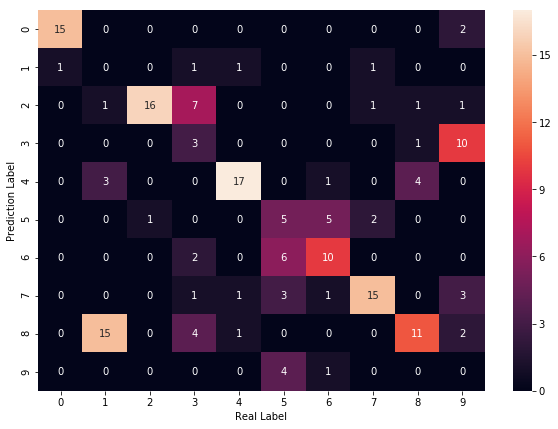

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[2 4 5 9] real:5
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[8] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[2] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[8] real:1
#10 min_error:0 index:[5] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:0 index:[9] real:6
#13 min_error:0 index:[2] real:3
#14 min_error:0 index:[8] real:1
#15 min_error:0 index:[8] real:3
#16 min_error:0 index:[7] real:9
#17 min_error:0 index:[8] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[4] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[2] real:3
#23 min_error:0 index:[8] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:1 index:[2 4 5 9] real:5
#27 min_error:0 index:[2] real:3
#28 min_error:0 index:[7] real:6
#29 min_error:1 index:[0 3 8] real:9
#30 

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5980210265924552
Avg Base Learner:0.8543599257884973


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08888888888888889
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.3055555555555556
Accuracy on training set: 0.4111111111111111


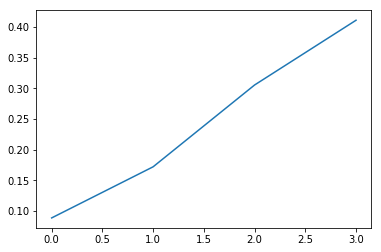

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.08888888888888889,
 0.17222222222222222,
 0.3055555555555556,
 0.4111111111111111]